**Part 1: Implement Logistic Regression**

In [75]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,BatchNormalization, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2
from keras import optimizers
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical


In [76]:
# Initializing sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [77]:
# Defining Prediction function 
def predict(w,b,x_test):
    y_head = sigmoid(np.dot(x_test, w) + b)
    Y_prediction = []
    # if y is bigger than 0.5, our prediction is sign one (y_prediction=1),
    # if y is smaller than 0.5, our prediction is sign zero (y_prediction=0),
    for i in range(y_head.shape[0]):
        if y_head[i] <= 0.5:
            Y_prediction.append(0)
        else:
            Y_prediction.append(1)

    return Y_prediction

In [79]:
# Reading the data set and storing in db variable
db= pd.read_csv('./diabetes.csv')

In [80]:

# Prititng the Data Set values
db.head()
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Print Correlation matrix**

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64


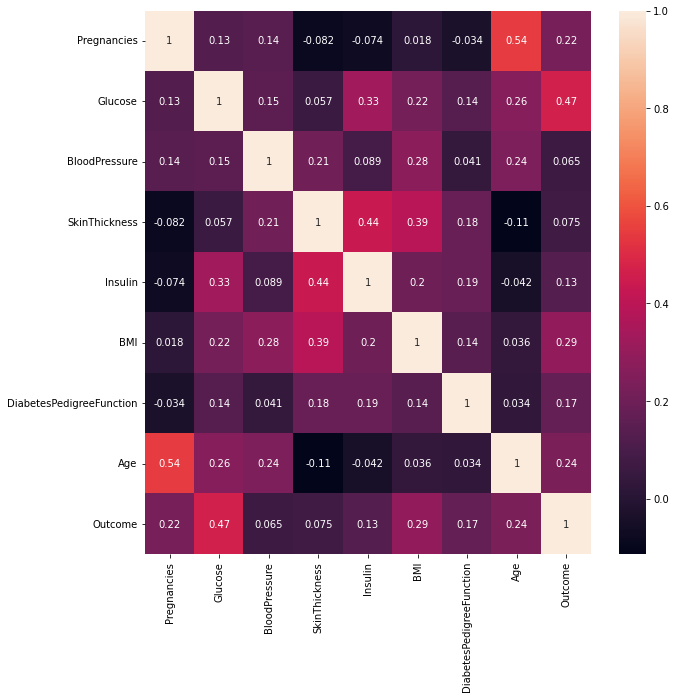

In [81]:

# Setting Correlation Matrix
correlation_matrix = db.corr()
skew = db.skew()
print(skew)
#plotting the Correlation Matrix
plt.figure(figsize=(10, 10))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

**Training and Testing the Logistic Regression Model**

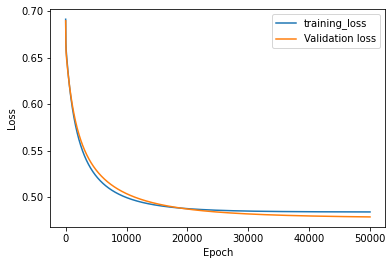

[[ 1.49549761]
 [ 6.23949868]
 [-1.0535444 ]
 [ 0.31464964]
 [-0.62949555]
 [ 5.57701897]
 [ 1.82359379]
 [ 1.4154523 ]]
-7.6498963119182255
LR Accuracy of test set%:  79.87012987012987
LR Accuracy of validation set%:  77.92207792207793


In [82]:

np.random.seed(2) # random seed for reproducibility
# Reading the data set and storing in db variable
db= pd.read_csv('./diabetes.csv')
#Listed the Features
features=np.asmatrix(db[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]])
#Listed the Outcomes
outcome =np.asmatrix(db[["Outcome"]])
# Normalization of Data using Scalar Function
norm=MinMaxScaler()
features=norm.fit_transform(features)
# Splitting  dataframes into 80% into training , 20 % testing and 20% Validation 
x_train, x_test, y_train, y_test = train_test_split(features, outcome, test_size = 0.4, random_state = 0)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = 0)
X, Y = x_train.T, y_train.reshape(1, y_train.shape[0])
M, N=x_val.T, y_val.reshape(1, y_val.shape[0])
# Fixing Epochs and learning rate
# epochs= 70000,60000
#learningrate= 0.02,0.03
epochs = 50000
learningrate = 0.05
losstrack = []
train_accuracy = []
val_loss=[]
m = X.shape[1]
e= M.shape[1]
w = np.random.randn(X.shape[0], 1)*0.01
b = 0
for epoch in range(epochs):
    z = np.dot(w.T, X) + b
    p = sigmoid(z)
    cost = -np.sum(np.multiply(np.log(p), Y) + np.multiply((1 - Y), np.log(1 - p)))/m
    losstrack.append(np.squeeze(cost)) # Training Loss
    dz = p-Y
    dw = (1 / m) * np.dot(X, dz.T)
    db = (1 / m) * np.sum(dz)
    w = w - learningrate * dw
    b = b - learningrate * db
# Validation Loss
    z_val = np.dot(w.T, M) + b
    p_val = sigmoid(z_val)
    val_cost = -np.sum(np.multiply(np.log(p_val), N) + np.multiply((1 - N), np.log(1 - p_val)))/e
    val_loss.append(val_cost)
    
plt.plot(losstrack,label='training_loss')
plt.plot(val_loss,label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
print(w)
print(b)


# predicting the Output value
ytestpred=predict(w,b,x_test)
yvalpred=predict(w,b,x_val)


# Defining the accuracy function
def accuracy(ypred,y_test):
  
  correct = 0
  length = len(y_test)
  for i in range(length):
    if ypred[i] == y_test[i]:
      correct += 1
      my_accuracy = (correct/length)*100

  return my_accuracy

# Testing and Checking accuracy for testing and Validation sets 

print ('LR Accuracy of test set%: ', accuracy(ytestpred,y_test))
print ('LR Accuracy of validation set%: ', accuracy(yvalpred,y_val))

**Part 2: Implementing Neural Networks**

**Training using Keras Neural Network Model**

In [83]:
# create model, add dense layers one by one specifying activation function
#Create the model using the Sequential API
model = Sequential() 
model.add(Dense(4, kernel_regularizer=l2(0.001),activation='relu',input_dim=8))  # Hidden layer 1 with L2 regularization.
model.add(Dense(8, activation='relu')) # Hidden Layer 2
model.add(Dense(1, activation='sigmoid')) #Since there is one Class between 0 and 1, we can use sigmoid Function

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['accuracy']) 
model.summary()

# Fit the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200,verbose=0, batch_size=10)


# Evaluating Model with testing data set.
loss, accuracy = model.evaluate(x_test, y_test)
training_loss, training_accuracy = model.evaluate(x_train, y_train)
Val_loss, val_accuracy = model.evaluate(x_val, y_val)

# Printing the Loss and Accuracy.
print('\n\n Loss', loss, '\n Testing Accuracy:', 100*(accuracy))
# print('\n\n Loss', loss, 'Validation Accuracy:', 100*(val_accuracy))




Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 9         
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.7792


 Loss 0.4449886977672577 
 Testing Accuracy: 79.22077775001526


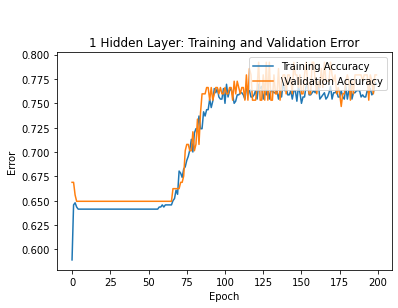

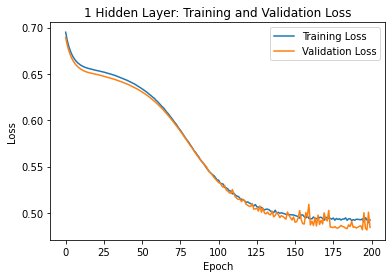

In [84]:
# Plotting graph between Validation accuracy and Testing accuracy.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('\n \n1 Hidden Layer: Training and Validation Error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', '\Validation Accuracy'], loc='upper right')
plt.show()

# Plotting graph between Validation Loss and Testing Loss.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('1 Hidden Layer: Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

**Part 3 : Implementing  different regularization
methods for the Neural Networks (DropOut)**

In [85]:


# create model, add dense layers one by one specifying activation function
#Create the model using the Sequential API
drpmodel = Sequential() 
drpmodel.add(Dense(4,activation='relu',input_dim=8))# Hidden layer 1

# Addding dropout with value 0.2
drpmodel.add(Dropout(.2)) 

drpmodel.add(Dense(8, activation='relu')) # Hidden Layer 2
drpmodel.add(Dense(1, activation='sigmoid')) #Since there is one Class between 0 and 1, we can use sigmoid Function

# Compile the model
drpmodel.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['accuracy']) 
drpmodel.summary()

# Fit the model
drphistory = drpmodel.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200,verbose=0, batch_size=10)


# Evaluating Model with testing data set.
drploss, drpaccuracy = drpmodel.evaluate(x_test, y_test)


# Printing the Loss and Accuracy.
print('\n\n Drop Loss', drploss, '\nDropOut Testing Accuracy:', 100*(drpaccuracy))
# print('\n\n Loss', loss, 'Validation Accuracy:', 100*(val_accuracy))





Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 4)                 36        
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_34 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 9         
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 3ms/step - loss: 0.4778 - accuracy: 0.7792


 Drop Loss 0.47775799036026 
DropOut Testing Accuracy: 77.92207598686218


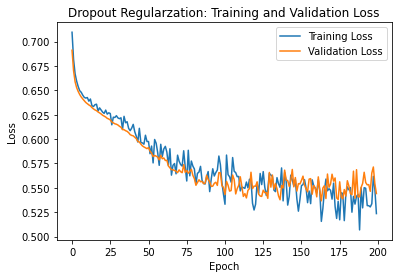

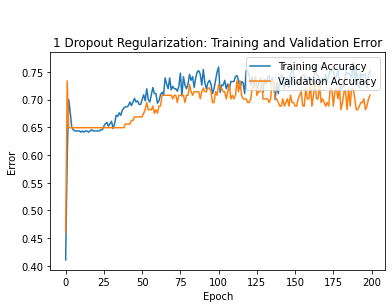

In [87]:
# Plotting graph between Validation Loss and Testing Loss.
plt.plot(drphistory.history['loss'])
plt.plot(drphistory.history['val_loss'])
plt.title('Dropout Regularzation: Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# Plotting graph between Validation accuracy and Testing accuracy.
plt.plot(drphistory.history['accuracy'])
plt.plot(drphistory.history['val_accuracy'])
plt.title('\n \n1 Dropout Regularization: Training and Validation Error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

